In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import SimpleImputer

In [116]:
dataset = pd.read_csv('seeds.csv')

In [117]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset)
dataset = imputer.transform(dataset)

In [118]:
out=np.where(dataset[:,3]<=2)
print(out)
for i in out:
    for j in range (0,3):
        print(i[j])
        dataset = np.delete(dataset,i[j],0)

(array([ 35, 169, 170], dtype=int64),)
35
169
170


In [119]:
out=np.where(dataset[:,4]>5)
print(out)
for i in out:
    for j in range (0,1):
        print(i[j])
        dataset = np.delete(dataset,i[j],0)

(array([168], dtype=int64),)
168


In [120]:
dataku = pd.DataFrame(dataset[:,3:5])
dataku.head()

,0,1
0,5.763,3.312
1,5.554,3.333
2,5.291,3.337
3,5.324,3.379
4,5.658,3.562


In [121]:
dataku.keys()

RangeIndex(start=0, stop=2, step=1)

In [122]:
x = dataku.iloc[:, :-1].values
y = dataku.iloc[:, 1].values

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [124]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [125]:
y_pred = regressor.predict(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

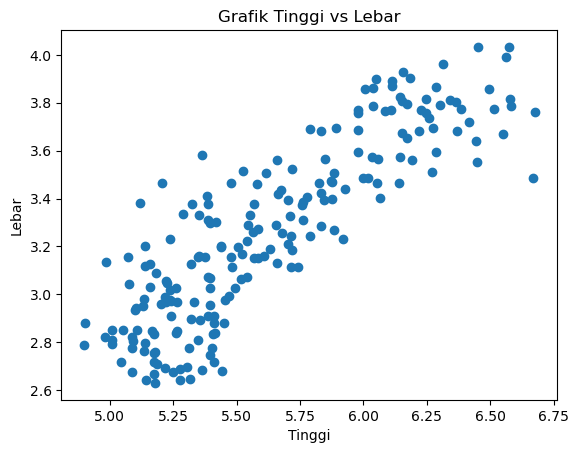

In [126]:
plt.scatter(dataku[0], dataku[1])
plt.xlabel("Tinggi")
plt.ylabel("Lebar")
plt.title("Grafik Tinggi vs Lebar")
plt.show

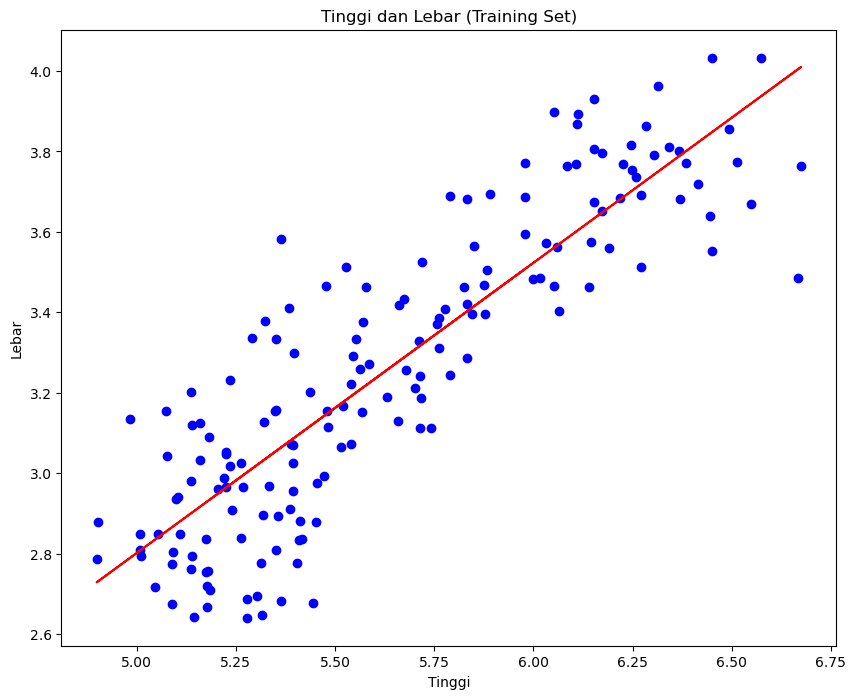

In [127]:
plt.figure(figsize=(10,8))

plt.scatter(x_train, y_train, color = 'blue')

plt.plot(x_train, regressor.predict(x_train), color = 'red')

plt.xlabel("Tinggi")
plt.ylabel("Lebar")
plt.title("Tinggi dan Lebar (Training Set)")

plt.show()

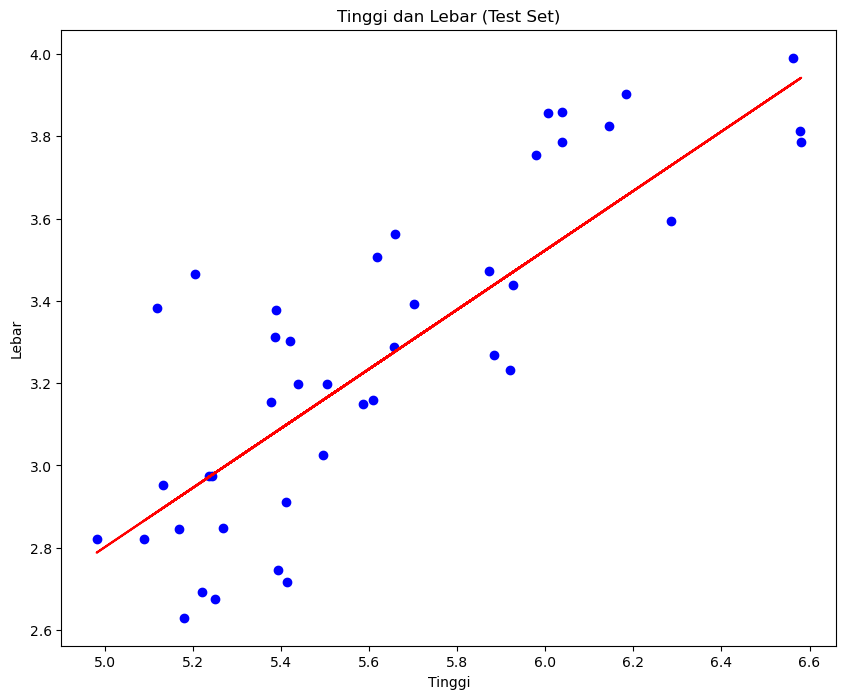

In [128]:
plt.figure(figsize=(10,8))

plt.scatter(x_test, y_test, color = 'blue')

plt.plot(x_test, regressor.predict(x_test), color = 'red')

plt.xlabel("Tinggi")
plt.ylabel("Lebar")
plt.title("Tinggi dan Lebar (Test Set)")

plt.show()